## Import Libraries


In [3]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Load data

In [7]:
crop_yield_data = pd.read_csv("../../data/crop_yield.csv")
crop_yield_data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


## Split data

In [8]:
predictors = crop_yield_data.drop('Yield_tons_per_hectare', axis=1)
target = crop_yield_data['Yield_tons_per_hectare']

In [9]:
# Identify categorical & numerical columns
categorical_cols = predictors.select_dtypes(include=["object", "category", "bool"]).columns
numeric_cols = predictors.select_dtypes(include='number').columns

In [10]:
predictors_train, predictors_test,target_train, target_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [11]:
# One-Hot Encode categorical variables
preprocessor = ColumnTransformer(transformers=[
                                ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
                                ("num", "passthrough", numeric_cols)])

## Linear Regression Model

In [12]:
linear_model_pipeline = Pipeline([("preprocessor", preprocessor),("model", LinearRegression())])

# Train the model
linear_model_pipeline =linear_model_pipeline.fit(predictors_train, target_train)

# Make predictions
linear_model_prediction =linear_model_pipeline.predict(predictors_test)

In [13]:
# Evaluate the model

linreg_rmse = np.sqrt(mean_squared_error(target_test, linear_model_prediction))
print(f"Linear Regression RMSE: {linreg_rmse}")
linreg_mae  = mean_absolute_error(target_test, linear_model_prediction)
print(f"Linear Regression MAE: {linreg_mae}")
linreg_r2   = r2_score(target_test, linear_model_prediction)
print(f"Linear Regression R2: {linreg_r2}")

Linear Regression RMSE: 0.5007795214261775
Linear Regression MAE: 0.399558608786541
Linear Regression R2: 0.9130125705769768


In [14]:
# Save the pipeline
joblib.dump(linear_model_pipeline, "yield_prediction_model.pkl")

['yield_prediction_model.pkl']

## CatBoost Model

In [ ]:
cat_features = list(categorical_cols) 

In [ ]:
catboost_model =  CatBoostRegressor(depth=8,learning_rate=0.1,iterations=500,loss_function="RMSE", verbose=0)

# Train the model
catboost_model.fit(predictors_train,target_train,cat_features=cat_features,eval_set=(predictors_test, target_test))

# Make predictions
catboost_predictions = catboost_model.predict(predictors_test)

In [ ]:
# Evaluate the model

catboost_rmse = np.sqrt(mean_squared_error(target_test, catboost_predictions))
print(f"Catboost RMSE: {catboost_rmse}")
catboost_mae  = mean_absolute_error(target_test, catboost_predictions)
print(f"Catboost MAE: {catboost_mae}")
catboost_r2   = r2_score(target_test, catboost_predictions)
print(f"Catboost R2: {catboost_r2}")

Catboost RMSE: 0.5010807299483928
Catboost MAE: 0.39979840394976496
Catboost R2: 0.912907896828419


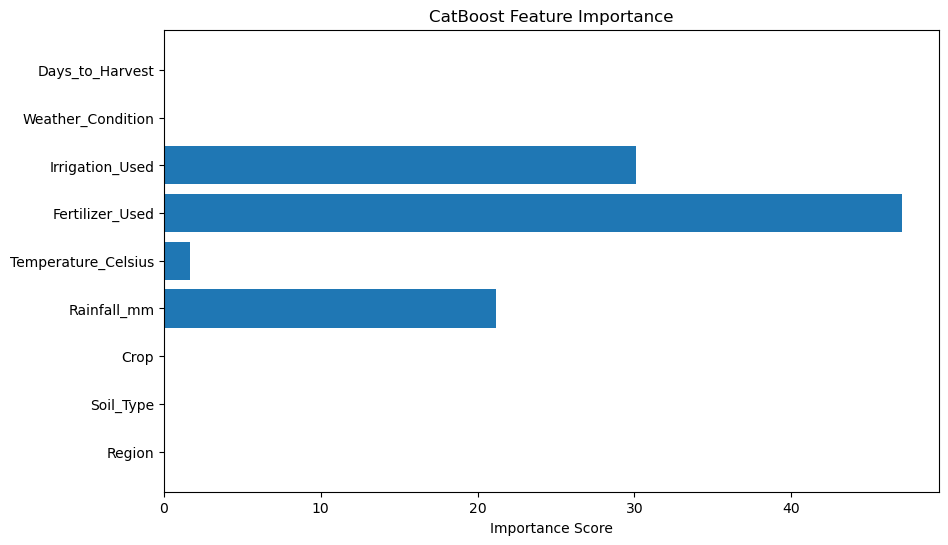

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(catboost_model.feature_names_, catboost_model.get_feature_importance())
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.show()